# Clustering

## K-means clustering

[]

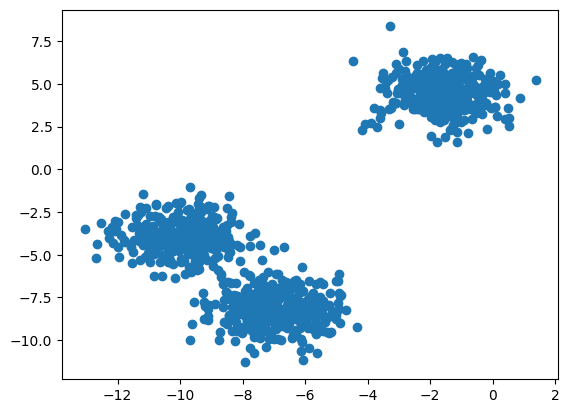

In [16]:
import sklearn.datasets as data
import matplotlib.pyplot as plt

X, clusters = data.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, random_state=1)
plt.scatter(X[:, 0], X[:, 1])
plt.plot()

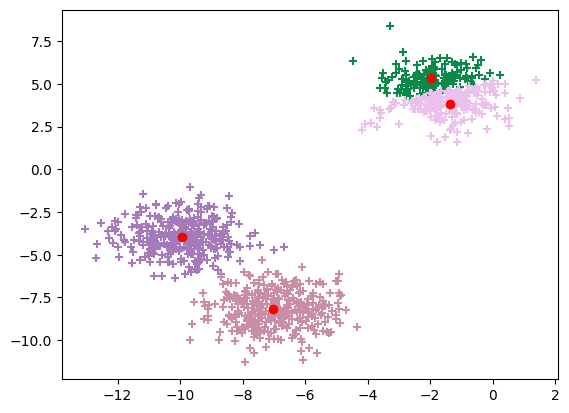

In [17]:
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from scripts.clustering_plotting import plot_cluster

k = 4

centroid_indices = (np.random.rand(k) * len(X)).astype('int')
centroids = []
for centroid_index in centroid_indices:
    centroids.append(X[centroid_index])
    
previous_memberships =  np.zeros(len(X))
labels = np.ones(len(X))
colors = []
for i in range(0, k):
        colors.append(np.random.rand(3,1).flatten())

iterations = 0
while(sum(previous_memberships) != sum(labels)):
    iterations = iterations + 1
    previous_memberships = labels.copy()
    plt.clf()
    # Update memberships
    for (index, (X_ind, membership)) in enumerate(zip(X, labels)):
        centroid_distances = []
        for centroid in centroids:
            distance = (X_ind[0] - centroid[0]) ** 2 + (X_ind[1] - centroid[1]) ** 2 # It should have square root, but it is still a continuous function, so computing it would be worthless and would waste computing time
            centroid_distances.append(distance)
        labels[index] = np.argmin(centroid_distances)

    # Update centroids
    for (index, centroid) in enumerate(centroids):
        X_boolean = labels == index
        X_filtered = X[X_boolean]
        centroids[index][0] = np.average(X_filtered[:, 0])
        centroids[index][1] = np.average(X_filtered[:, 1])

    plot_cluster(labels, colors, X, k, centroids=centroids)
    plt.plot()
    display(plt.gcf())
    clear_output(wait=True)

## Within cluster similarity

In [18]:
def compute_within_cluster_similarity(labels, centroids):
    WC = 0

    for i in range(0, k):
        X_boolean = labels == i
        X_filtered = X[X_boolean]
        total_distance_sum = 0
        for X_cluster_ind in X_filtered:
            individual_distance = (X_cluster_ind[0] - centroids[i][0]) ** 2 + (X_cluster_ind[1] - centroids[i][1]) ** 2
            total_distance_sum = total_distance_sum + individual_distance
        WC = total_distance_sum + WC
    print(f'Within cluster similarity: {WC}')
    return WC
WC = compute_within_cluster_similarity(labels=labels, centroids=centroids)

Within cluster similarity: 1776.363567740767


## Between cluster similarity

In [19]:
def compute_between_cluster_similarity(labels, centroids):
    BC = 0
    for i in range(0, k-1):
        distance_sum = 0
        for j in range(i,k):
            if (i != j):
                distance = (centroids[i][0] - centroids[j][0])**2 + (centroids[i][1] - centroids[j][1])**2
                distance_sum = distance + distance_sum
        BC = distance_sum + BC
    print(f'Between cluster similarity: {BC}')
    return BC

BC = compute_between_cluster_similarity(labels=labels, centroids=centroids)

Between cluster similarity: 697.1341363441761


## Overall clustering score

In [20]:
score = BC / WC
print(f'Overall clustering score: {score}')

Overall clustering score: 0.3924501430925047


## K-means using scikit

The within cluster score is 1760.1066855243519


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


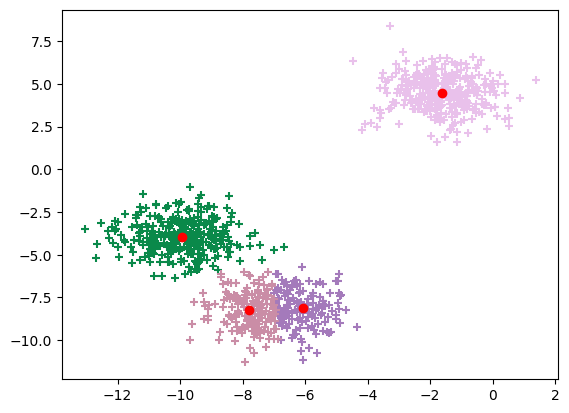

In [21]:
import sklearn.cluster as cluster
km = cluster.KMeans(n_clusters=k)

km.fit(X)
plot_cluster(km.labels_, colors, X, k, centroids=km.cluster_centers_.tolist())
print(f'The within cluster score is {km.inertia_}')

In [22]:
# Compare with previous results
compute_within_cluster_similarity(labels=km.labels_, centroids=km.cluster_centers_)

Within cluster similarity: 1760.1066855243512


1760.1066855243512

In [23]:
import sklearn.metrics as metrics

SC = metrics.silhouette_score(X, km.labels_, metric = 'euclidean')
CH = metrics.calinski_harabasz_score(X, km.labels_)
print(f'Silhouette score: {SC}')
print(f'Calinski Harabasz score: {CH}')

Silhouette score: 0.6058197002717589
Calinski Harabasz score: 7489.798498038066
